In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = '../data/train/'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 351.77777777777777
Max Height: 632
Min Height: 200


Average Width: 413.77777777777777
Max Width: 499
Min Width: 200


In [2]:
def label_img(name):
    word_label = name.split('_')[0]
    if word_label == 'penguin': return np.array([1, 0,0])
    elif word_label == 'mexican-duck' : return np.array([0, 1,0])
    elif word_label == 'labrador' : return np.array([0,0, 1])

In [3]:
IMG_SIZE = 300

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

In [17]:
train_data = load_training_data()


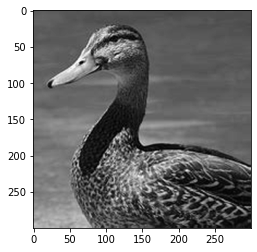

In [23]:
plt.imshow(train_data[8][0], cmap = 'gist_gray')

In [19]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
print(trainLabels)

[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [9]:
model.fit(trainImages, trainLabels, batch_size = 1, epochs = 10, verbose = 1)

Epoch 1/10
18/18 [==============================] - 3s 119ms/step - loss: 1.0275 - accuracy: 0.4295
Epoch 2/10
18/18 [==============================] - 2s 115ms/step - loss: 0.3303 - accuracy: 0.9033
Epoch 3/10
18/18 [==============================] - 2s 117ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 2s 114ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 2s 116ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 2s 118ms/step - loss: 7.3667e-04 - accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 2s 116ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
18/18 [==============================] - 2s 119ms/step - loss: 2.9352e-04 - accuracy: 1.0000
Epoch 9/10
18/18 [==============================] - 2s 130ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
18/18 [==============================] - 2s 123ms/step - loss: 3.5928e-04 - accu

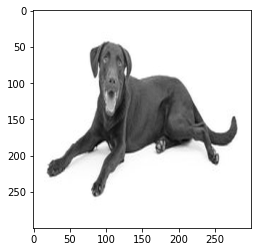

In [10]:
# Test on Test Set
TEST_DIR = '../data/test/'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[0][0], cmap = 'gist_gray')

In [11]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

#loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
#print(acc * 100)
model.predict(testImages)
#plt.imshow(testImages[0], cmap = 'gist_gray')

array([[0.1294966, 0.1444736, 0.7260298]], dtype=float32)